In [1]:
#preprocessing tools
import pandas as pd
import numpy as np

#EDA Tools
import pandas_profiling
%matplotlib inline
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

#modeling
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import roc_auc_score, confusion_matrix, recall_score, precision_score,accuracy_score
from sklearn.metrics import roc_curve, precision_recall_curve, classification_report,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 

## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


import warnings
warnings.filterwarnings('ignore')

## preprocessing

In [2]:
train_data=pd.read_csv('income_train.csv')

In [3]:
test_data=pd.read_csv('income_test.csv')

In [4]:
train_data.shape

(22792, 16)

In [5]:
test_data.shape

(9769, 16)

In [6]:
data=pd.concat([train_data,test_data],axis='rows',sort=False,ignore_index=False)

In [7]:
data.shape

(32561, 16)

In [8]:
data.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,12359,49,Private,180532,Masters,14,Married-spouse-absent,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,<=50K
1,11680,35,Local-gov,308945,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
2,13682,28,Private,47907,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
3,8807,32,Private,198068,HS-grad,9,Never-married,Transport-moving,Not-in-family,White,Male,0,0,60,United-States,<=50K
4,16644,23,Private,192978,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K


In [9]:
data.columns

Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education.num', 'marital.status', 'occupation', 'relationship', 'race',
       'sex', 'capital.gain', 'capital.loss', 'hours.per.week',
       'native.country', 'income'],
      dtype='object')

### Removing Unique Id

In [10]:
data.drop(columns=['Unnamed: 0'],inplace =True)

In [11]:
data.shape

(32561, 15)

In [12]:
data.drop_duplicates(inplace =True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 9768
Data columns (total 15 columns):
age               32537 non-null int64
workclass         32537 non-null object
fnlwgt            32537 non-null int64
education         32537 non-null object
education.num     32537 non-null int64
marital.status    32537 non-null object
occupation        32537 non-null object
relationship      32537 non-null object
race              32537 non-null object
sex               32537 non-null object
capital.gain      32537 non-null int64
capital.loss      32537 non-null int64
hours.per.week    32537 non-null int64
native.country    32537 non-null object
income            32537 non-null object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [14]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,49,Private,180532,Masters,14,Married-spouse-absent,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,<=50K
1,35,Local-gov,308945,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
2,28,Private,47907,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
3,32,Private,198068,HS-grad,9,Never-married,Transport-moving,Not-in-family,White,Male,0,0,60,United-States,<=50K
4,23,Private,192978,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K


In [15]:
data['age'].unique()

array([49, 35, 28, 32, 23, 20, 46, 55, 26, 59, 43, 24, 58, 39, 29, 36, 45,
       40, 44, 41, 50, 56, 34, 54, 17, 21, 66, 61, 47, 42, 18, 25, 31, 22,
       30, 33, 60, 19, 62, 38, 52, 27, 37, 48, 69, 75, 57, 65, 51, 53, 67,
       70, 71, 64, 63, 77, 79, 68, 80, 73, 74, 72, 82, 90, 76, 78, 81, 84,
       83, 88, 86, 85, 87], dtype=int64)

In [16]:
data['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-inc', 'State-gov',
       'Federal-gov', 'Self-emp-not-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [17]:
data['fnlwgt'].unique()

array([180532, 308945,  47907, ...,  90290, 330901,  97847], dtype=int64)

In [18]:
data['income'] = data['income'].replace({'<=50K':0,'>50K':1}) 

In [19]:
data[data['education'] == '?'] 

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income


In [20]:
data.shape

(32537, 15)

In [21]:
data[data['occupation'] == '?'] 

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
5,20,?,141453,Some-college,10,Never-married,?,Own-child,White,Female,0,0,10,United-States,0
15,36,?,216256,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,3464,0,30,United-States,0
32,17,?,171461,10th,6,Never-married,?,Own-child,White,Female,0,0,20,United-States,0
33,21,?,191806,Some-college,10,Never-married,?,Own-child,White,Male,0,0,75,United-States,0
34,66,?,357750,11th,7,Widowed,?,Not-in-family,Black,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9705,20,?,220115,HS-grad,9,Never-married,?,Own-child,White,Male,0,0,12,United-States,0
9725,68,?,229016,HS-grad,9,Married-civ-spouse,?,Wife,White,Female,0,0,25,United-States,0
9752,24,?,265434,Bachelors,13,Never-married,?,Not-in-family,White,Female,0,0,40,United-States,0
9760,29,?,134566,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,50,United-States,1


In [22]:
data.drop(data[data['occupation'] == '?'].index,inplace = True)

In [23]:
data.drop(data[data['workclass'] == '?'].index,inplace = True) 

In [24]:
data.shape

(29655, 15)

In [25]:
data.drop(data[data['occupation'] == '?'].index)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,49,Private,180532,Masters,14,Married-spouse-absent,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,0
1,35,Local-gov,308945,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,1
2,28,Private,47907,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0
4,23,Private,192978,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,0
6,46,Private,167882,HS-grad,9,Divorced,Tech-support,Not-in-family,White,Female,0,0,43,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9763,49,Local-gov,170846,Masters,14,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,0
9765,48,Private,148995,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States,1
9766,46,Federal-gov,330901,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,40,United-States,0
9767,66,Self-emp-not-inc,97847,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,0


In [26]:
data.shape

(29655, 15)

In [27]:
data['workclass'].unique()

array(['Private', 'Local-gov', 'Self-emp-inc', 'State-gov', 'Federal-gov',
       'Self-emp-not-inc', 'Without-pay'], dtype=object)

In [28]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [29]:
len(data['fnlwgt'].unique())

19984

In [30]:
data['education'].unique()

array(['Masters', 'HS-grad', 'Bachelors', 'Some-college', 'Assoc-acdm',
       '12th', '10th', '11th', '1st-4th', 'Assoc-voc', 'Prof-school',
       '9th', '7th-8th', '5th-6th', 'Preschool', 'Doctorate'],
      dtype=object)

In [31]:
data['education.num'].unique()

array([14,  9, 13, 10, 12,  8,  6,  7,  2, 11, 15,  5,  4,  3,  1, 16],
      dtype=int64)

In [32]:
data['marital.status'].unique()

array(['Married-spouse-absent', 'Married-civ-spouse', 'Never-married',
       'Divorced', 'Separated', 'Widowed', 'Married-AF-spouse'],
      dtype=object)

In [33]:
data['occupation'].unique()

array(['Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Handlers-cleaners', 'Tech-support', 'Sales', 'Exec-managerial',
       'Machine-op-inspct', 'Transport-moving', 'Other-service',
       'Protective-serv', 'Farming-fishing', 'Priv-house-serv',
       'Armed-Forces'], dtype=object)

In [34]:
data['relationship'].unique()

array(['Not-in-family', 'Husband', 'Own-child', 'Unmarried',
       'Other-relative', 'Wife'], dtype=object)

In [35]:
data['race'].unique()

array(['White', 'Black', 'Amer-Indian-Eskimo', 'Other',
       'Asian-Pac-Islander'], dtype=object)

In [36]:
data['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [37]:
data['capital.gain'].unique()

array([    0, 99999, 10520,  3137,  7688,  3103, 14084,  7298,  4064,
       15024,  2202,  5013,  2829, 25236,  4865,  2597,  4508,  1055,
        3464,  5721,  4787,  5178,  2174,  3908,  8614,  2580,  4386,
        9386,  3325,  3411,  3471,  3674,  3942,  4416,  2907, 27828,
        4934,  4650,  2354,  6767, 13550,  2176, 14344,  2346,   991,
        2977,  6497,   594,  3781,  2407,  6360,   914,  3818,  2290,
        1424,  6849,  2936,  2463, 10566, 20051,  2635,  7430,  2228,
        1506,  5455,  9562,  5556,  4687,  3456,  1151,   401,  4101,
        2329,  1471, 25124, 15020,  3418,  7443,  2036,  6418,  2062,
        2961,  2885, 18481,  1086,  1797, 34095, 10605,   114, 15831,
        1848,  6723,  3273,  1831,  2414,  7978,  1639,  2538,  2105,
        6514,  2653,  2964,  2993,  3887,  3432,  1409,  1455,  5060,
        7896,  6097,  1173,  4931, 11678,  2050,  2009,  2387, 22040,
       41310], dtype=int64)

In [38]:
data['capital.loss'].unique()

array([   0, 1887, 1977, 2415, 1564, 1741, 1974, 1485, 1902, 1504, 2001,
       1380, 1672,  323, 1848, 1590, 1980, 2603, 2246, 2174, 2051, 1594,
       1573, 1579, 1669, 1651, 2559, 2824, 2547, 1740, 1735, 2205, 2206,
       1408, 2258, 1340, 1602, 1719, 1628, 1876, 2339, 1825, 2002, 2231,
       2392, 2444, 1755, 1762, 1721,  625, 2057, 1648, 2377, 1617, 2080,
       1844, 1092, 1816, 2352, 2179, 3004, 3770,  155,  419, 2129,  213,
        880,  653, 4356, 2282, 1138, 2042, 1668, 3683, 1726, 2467,  974,
       3900, 1258, 1539, 2238, 2149,  810, 1411, 2457, 1944, 2267, 2754,
       2472, 2201], dtype=int64)

In [39]:
data['hours.per.week'].unique()

array([40, 43, 60, 50, 38, 46, 45, 42, 58, 20, 70, 48, 25, 35, 65, 12, 44,
       30, 84, 32, 64, 56, 24, 36, 55, 75, 37,  8, 52, 14, 26,  5,  4, 53,
       31, 99, 15, 13, 90, 10, 72, 51, 21, 54,  6, 80, 77, 23, 16, 39, 18,
        3, 86, 33, 28, 49, 17, 27,  2, 34, 63,  7, 22, 62, 57, 41, 96,  9,
       47, 76, 78, 61, 98, 19, 29,  1, 91, 95, 66, 88, 85, 11, 67, 68, 82,
       73, 59, 97, 74, 92, 89, 87, 94, 81], dtype=int64)

In [40]:
data['native.country'].unique()

array(['United-States', 'Puerto-Rico', 'Mexico', 'South', 'Guatemala',
       'Jamaica', 'Iran', 'England', 'Philippines', 'Columbia', '?',
       'Peru', 'China', 'Laos', 'Poland', 'Honduras', 'Ireland', 'India',
       'Japan', 'Cuba', 'Cambodia', 'Portugal', 'Germany', 'El-Salvador',
       'Scotland', 'Italy', 'France', 'Hungary', 'Haiti',
       'Dominican-Republic', 'Vietnam', 'Thailand', 'Nicaragua', 'Taiwan',
       'Greece', 'Canada', 'Trinadad&Tobago', 'Ecuador', 'Yugoslavia',
       'Outlying-US(Guam-USVI-etc)', 'Hong', 'Holand-Netherlands'],
      dtype=object)

In [41]:
data.drop(data[data['native.country'] == '?'].index,inplace = True)

In [42]:
data.shape

(28825, 15)

In [43]:
data.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
age,1.000000,-0.075337,0.044721,0.080460,0.058722,0.101089,0.241275
fnlwgt,-0.075337,1.000000,-0.044488,-0.000738,-0.010110,-0.020436,-0.007560
education.num,0.044721,-0.044488,1.000000,0.124596,0.079911,0.153137,0.337093
capital.gain,0.080460,-0.000738,0.124596,1.000000,-0.032367,0.079714,0.220440
capital.loss,0.058722,-0.010110,0.079911,-0.032367,1.000000,0.052170,0.149990
hours.per.week,0.101089,-0.020436,0.153137,0.079714,0.052170,1.000000,0.230301
income,0.241275,-0.007560,0.337093,0.220440,0.149990,0.230301,1.000000


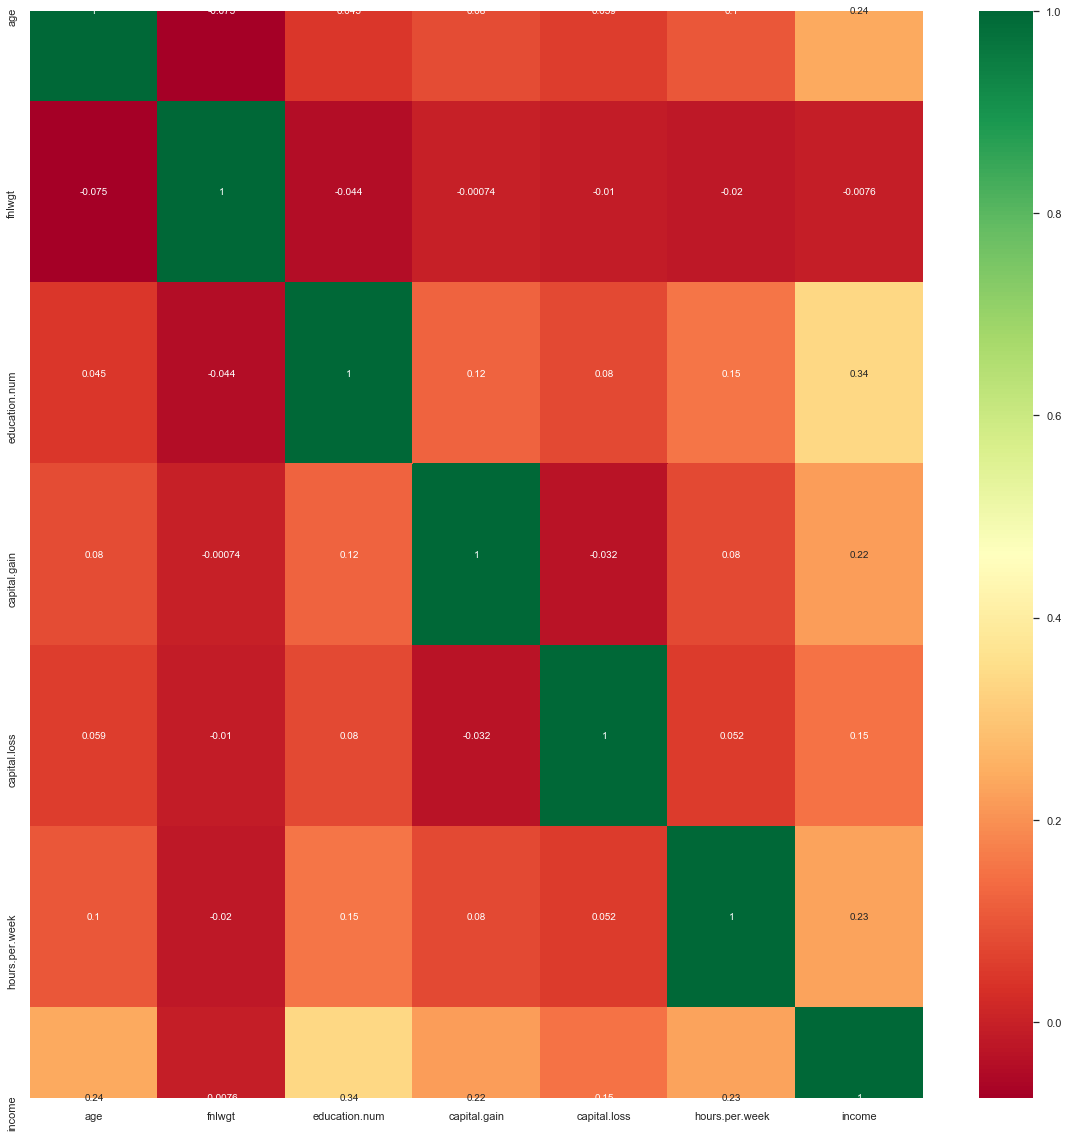

In [44]:
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")

## Removing unrelated Columns

In [92]:
data.to_excel('Income_Prediction_PreProcessing.xlsx',index=False)

In [45]:
data.drop(columns=['fnlwgt'],inplace=True)

In [46]:
data.shape

(28825, 14)

In [47]:
data.drop(columns=['education'],inplace=True)

In [48]:
categorical_data=data.select_dtypes(exclude=np.number)

In [49]:
categorical_data

,workclass,marital.status,occupation,relationship,race,sex,native.country
0,Private,Married-spouse-absent,Prof-specialty,Not-in-family,White,Male,United-States
1,Local-gov,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
2,Private,Never-married,Adm-clerical,Not-in-family,White,Female,United-States
4,Private,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,United-States
6,Private,Divorced,Tech-support,Not-in-family,White,Female,United-States
...,...,...,...,...,...,...,...
9762,Private,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
9765,Private,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
9766,Federal-gov,Married-civ-spouse,Exec-managerial,Husband,Black,Male,United-States
9767,Self-emp-not-inc,Married-civ-spouse,Sales,Husband,White,Male,United-States


In [50]:
num_data=data.select_dtypes(include=np.number)

In [51]:
num_data

,age,education.num,capital.gain,capital.loss,hours.per.week,income
0,49,14,0,0,40,0
1,35,9,0,0,40,1
2,28,13,0,0,40,0
4,23,9,0,0,40,0
6,46,9,0,0,43,0
...,...,...,...,...,...,...
9762,59,10,0,0,34,0
9765,48,14,0,0,55,1
9766,46,10,0,0,40,0
9767,66,13,0,0,50,0


In [52]:
one_hot_encoder = pd.get_dummies(categorical_data)

In [53]:
one_hot_encoder

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9762,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9765,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9766,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9767,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [54]:
data_preprocessed = pd.concat([num_data,one_hot_encoder],axis='columns')

In [55]:
data_preprocessed.shape

(28825, 88)

In [56]:
data_preprocessed.corr()

,age,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
age,1.000000,0.044721,0.080460,0.058722,0.101089,0.241275,0.058531,0.070113,-0.213474,0.111943,...,0.001715,0.008653,0.000009,0.002919,-0.008581,-0.003046,0.005471,0.016486,-0.017943,0.000652
education.num,0.044721,1.000000,0.124596,0.079911,0.153137,0.337093,0.059702,0.098576,-0.165669,0.078772,...,-0.043322,-0.042318,0.001837,0.017673,0.048947,0.008678,-0.015019,0.126327,-0.010834,-0.001726
capital.gain,0.080460,0.124596,1.000000,-0.032367,0.079714,0.220440,-0.006024,-0.008622,-0.046903,0.096583,...,-0.003723,-0.006237,-0.002886,-0.002432,0.008667,-0.003481,-0.003481,0.012133,-0.002242,-0.002364
capital.loss,0.058722,0.079911,-0.032367,1.000000,0.052170,0.149990,0.008712,0.016086,-0.036267,0.032984,...,-0.007305,-0.004423,-0.004282,0.006107,0.001972,-0.005164,0.010170,0.016475,0.000787,-0.005164
hours.per.week,0.101089,0.153137,0.079714,0.052170,1.000000,0.230301,0.006990,0.001905,-0.095801,0.127236,...,0.004366,-0.011825,0.000708,0.015559,-0.001277,0.017330,-0.003176,0.009788,-0.011686,0.007138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native.country_Thailand,-0.003046,0.008678,-0.003481,-0.005164,0.017330,-0.003429,-0.004238,-0.006412,-0.009395,0.019309,...,-0.000786,-0.001432,-0.000460,-0.001154,-0.000867,1.000000,-0.000555,-0.076107,-0.001085,-0.000555
native.country_Trinadad&Tobago,0.005471,-0.015019,-0.003481,0.010170,-0.003176,-0.006828,-0.004238,-0.000598,0.000652,0.003416,...,-0.000786,-0.001432,-0.000460,-0.001154,-0.000867,-0.000555,1.000000,-0.076107,-0.001085,-0.000555
native.country_United-States,0.016486,0.126327,0.012133,0.016475,0.009788,0.040483,0.017625,0.033852,-0.051418,0.008515,...,-0.107662,-0.196200,-0.063099,-0.158194,-0.118870,-0.076107,-0.076107,1.000000,-0.148720,-0.076107
native.country_Vietnam,-0.017943,-0.010834,-0.002242,0.000787,-0.011686,-0.019658,0.000386,-0.003591,0.010286,-0.004779,...,-0.001535,-0.002798,-0.000900,-0.002256,-0.001695,-0.001085,-0.001085,-0.148720,1.000000,-0.001085


## Modeling

In [57]:
x=data_preprocessed.drop(columns=['income'])

In [58]:
y=data_preprocessed['income']

In [59]:
x.shape

(28825, 87)

In [60]:
y.shape

(28825,)

In [61]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28825 entries, 0 to 9768
Data columns (total 87 columns):
age                                          28825 non-null int64
education.num                                28825 non-null int64
capital.gain                                 28825 non-null int64
capital.loss                                 28825 non-null int64
hours.per.week                               28825 non-null int64
workclass_Federal-gov                        28825 non-null uint8
workclass_Local-gov                          28825 non-null uint8
workclass_Private                            28825 non-null uint8
workclass_Self-emp-inc                       28825 non-null uint8
workclass_Self-emp-not-inc                   28825 non-null uint8
workclass_State-gov                          28825 non-null uint8
workclass_Without-pay                        28825 non-null uint8
marital.status_Divorced                      28825 non-null uint8
marital.status_Married-AF-spouse  

In [62]:
std = StandardScaler()

In [63]:
X_std=std.fit_transform(x)

In [64]:
x_train,x_test,y_train,y_test=train_test_split(X_std,y,test_size=0.3, random_state = 0)

In [65]:
def roc_draw(x_test, y_test,logreg):
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
    fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

In [66]:
accuracy_train=[];
accuracy_test=[];
model_name=[];
def model_fit(model,x_train,x_test,y_train,y_test,name):
    model.fit(x_train,y_train)
 ##   model.predict_proba(x_train)
    y_train_predicted = model.predict(x_train);
    accuracy_error_train=accuracy_score(y_train,y_train_predicted)
    print(" Train Accuracy-Score :",accuracy_error_train)
    print(classification_report(y_train,y_train_predicted))
    y_test_predicted = model.predict(x_test);
    accuracy_error_test=accuracy_score(y_test,y_test_predicted)
    print(" Test Accuracy-Score :",accuracy_error_test)
    print(classification_report(y_test,y_test_predicted))
    accuracy_train.append(accuracy_error_train)
    accuracy_test.append(accuracy_error_test)
    model_name.append(name)
    if name!='SVC':
        roc_draw(x_train, y_train,model)

 Train Accuracy-Score : 0.8501263815235168
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     15124
           1       0.74      0.62      0.67      5053

    accuracy                           0.85     20177
   macro avg       0.81      0.77      0.79     20177
weighted avg       0.84      0.85      0.85     20177

 Test Accuracy-Score : 0.8425069380203515
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      6479
           1       0.73      0.60      0.66      2169

    accuracy                           0.84      8648
   macro avg       0.80      0.76      0.78      8648
weighted avg       0.84      0.84      0.84      8648



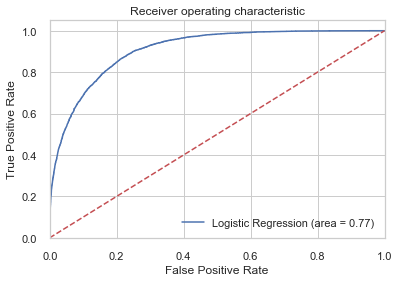

In [67]:
logistic = LogisticRegression()
model_fit(logistic,x_train,x_test,y_train,y_test,'LogisticRegression')

 Train Accuracy-Score : 0.8741636516826089
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     15124
           1       0.78      0.69      0.73      5053

    accuracy                           0.87     20177
   macro avg       0.84      0.81      0.83     20177
weighted avg       0.87      0.87      0.87     20177

 Test Accuracy-Score : 0.821577243293247
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      6479
           1       0.67      0.57      0.62      2169

    accuracy                           0.82      8648
   macro avg       0.77      0.74      0.75      8648
weighted avg       0.81      0.82      0.82      8648



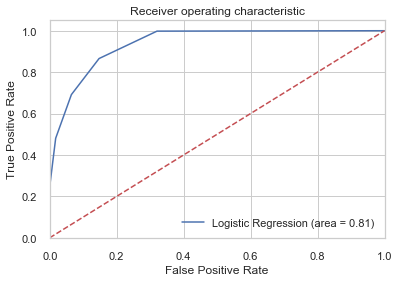

In [68]:
knn = KNeighborsClassifier()
model_fit(knn,x_train,x_test,y_train,y_test,'KNeighborsClassifier')

 Train Accuracy-Score : 0.8502750656688308
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     15124
           1       0.74      0.62      0.67      5053

    accuracy                           0.85     20177
   macro avg       0.81      0.77      0.79     20177
weighted avg       0.84      0.85      0.85     20177

 Test Accuracy-Score : 0.8427382053654024
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      6479
           1       0.73      0.60      0.66      2169

    accuracy                           0.84      8648
   macro avg       0.80      0.76      0.78      8648
weighted avg       0.84      0.84      0.84      8648



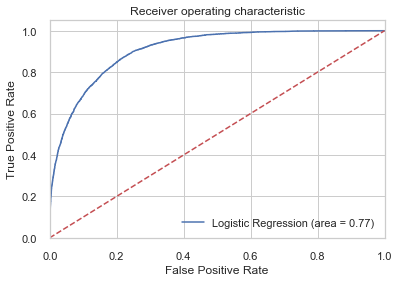

In [69]:
lasso = LogisticRegression(penalty='l1')
model_fit(lasso,x_train,x_test,y_train,y_test,'lasso')

 Train Accuracy-Score : 0.8501263815235168
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     15124
           1       0.74      0.62      0.67      5053

    accuracy                           0.85     20177
   macro avg       0.81      0.77      0.79     20177
weighted avg       0.84      0.85      0.85     20177

 Test Accuracy-Score : 0.8425069380203515
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      6479
           1       0.73      0.60      0.66      2169

    accuracy                           0.84      8648
   macro avg       0.80      0.76      0.78      8648
weighted avg       0.84      0.84      0.84      8648



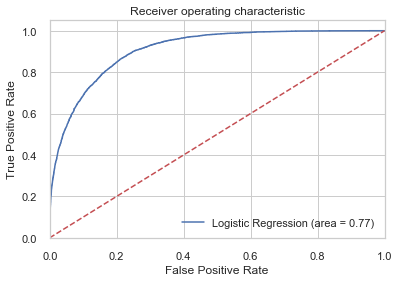

In [70]:
ridge = LogisticRegression(penalty='l2')
model_fit(ridge,x_train,x_test,y_train,y_test,'ridge')

 Train Accuracy-Score : 0.8431877880755315
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     15124
           1       0.71      0.62      0.67      5053

    accuracy                           0.84     20177
   macro avg       0.80      0.77      0.78     20177
weighted avg       0.84      0.84      0.84     20177

 Test Accuracy-Score : 0.8390379278445883
              precision    recall  f1-score   support

           0       0.88      0.92      0.89      6479
           1       0.71      0.61      0.66      2169

    accuracy                           0.84      8648
   macro avg       0.79      0.76      0.78      8648
weighted avg       0.83      0.84      0.83      8648



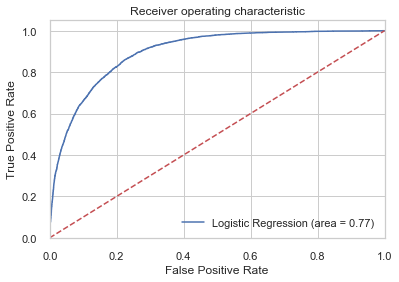

In [71]:
elasticnet = SGDClassifier(loss='log')
model_fit(elasticnet,x_train,x_test,y_train,y_test,'elasticnet')

 Train Accuracy-Score : 0.7536303712147495
              precision    recall  f1-score   support

           0       0.91      0.74      0.82     15124
           1       0.51      0.79      0.62      5053

    accuracy                           0.75     20177
   macro avg       0.71      0.77      0.72     20177
weighted avg       0.81      0.75      0.77     20177

 Test Accuracy-Score : 0.7585568917668826
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      6479
           1       0.51      0.79      0.62      2169

    accuracy                           0.76      8648
   macro avg       0.71      0.77      0.72      8648
weighted avg       0.81      0.76      0.77      8648



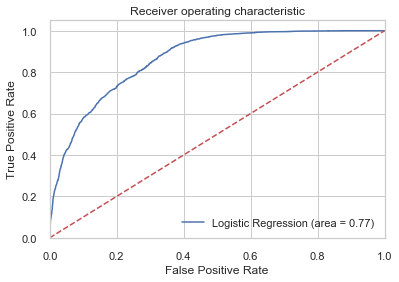

In [72]:
bnb = BernoulliNB()
model_fit(bnb,x_train,x_test,y_train,y_test,'BernoulliNB')

 Train Accuracy-Score : 0.3794915002230262
              precision    recall  f1-score   support

           0       0.96      0.18      0.30     15124
           1       0.28      0.98      0.44      5053

    accuracy                           0.38     20177
   macro avg       0.62      0.58      0.37     20177
weighted avg       0.79      0.38      0.34     20177

 Test Accuracy-Score : 0.3805504162812211
              precision    recall  f1-score   support

           0       0.96      0.18      0.30      6479
           1       0.29      0.98      0.44      2169

    accuracy                           0.38      8648
   macro avg       0.62      0.58      0.37      8648
weighted avg       0.79      0.38      0.34      8648



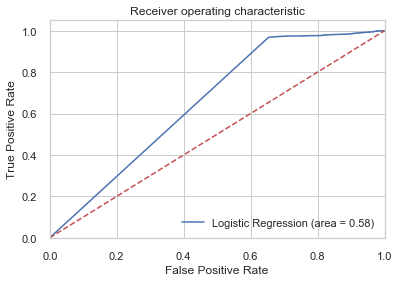

In [73]:
nb = GaussianNB()
model_fit(nb,x_train,x_test,y_train,y_test,'GaussianNB')

 Train Accuracy-Score : 0.8632601476929177
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     15124
           1       0.79      0.62      0.70      5053

    accuracy                           0.86     20177
   macro avg       0.83      0.78      0.80     20177
weighted avg       0.86      0.86      0.86     20177

 Test Accuracy-Score : 0.8581174838112858
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6479
           1       0.78      0.61      0.68      2169

    accuracy                           0.86      8648
   macro avg       0.83      0.77      0.80      8648
weighted avg       0.85      0.86      0.85      8648



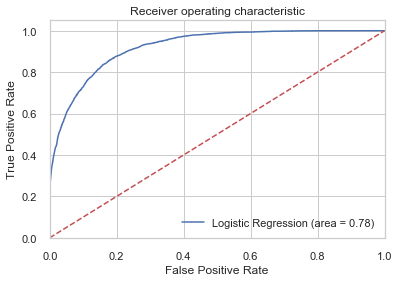

In [74]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
model_fit(clf,x_train,x_test,y_train,y_test,'AdaBoostClassifier')

 Train Accuracy-Score : 0.969073697774694
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     15124
           1       0.96      0.91      0.94      5053

    accuracy                           0.97     20177
   macro avg       0.97      0.95      0.96     20177
weighted avg       0.97      0.97      0.97     20177

 Test Accuracy-Score : 0.8341813135985199
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      6479
           1       0.70      0.59      0.64      2169

    accuracy                           0.83      8648
   macro avg       0.79      0.75      0.77      8648
weighted avg       0.83      0.83      0.83      8648



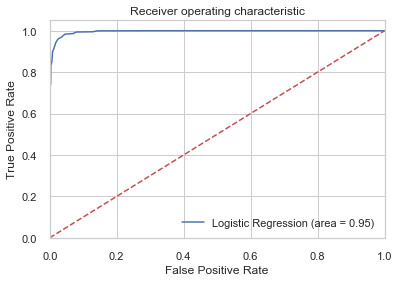

In [75]:
random = RandomForestClassifier(n_estimators=10)
model_fit(random,x_train,x_test,y_train,y_test,'RandomForestClassifier')

 Train Accuracy-Score : 0.8662338305991971
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     15124
           1       0.80      0.62      0.70      5053

    accuracy                           0.87     20177
   macro avg       0.84      0.78      0.81     20177
weighted avg       0.86      0.87      0.86     20177

 Test Accuracy-Score : 0.8592738205365402
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6479
           1       0.79      0.60      0.68      2169

    accuracy                           0.86      8648
   macro avg       0.83      0.77      0.80      8648
weighted avg       0.85      0.86      0.85      8648



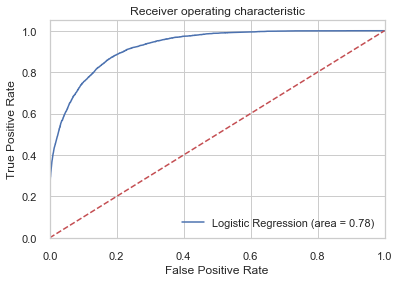

In [76]:
gbc = GradientBoostingClassifier()
model_fit(gbc,x_train,x_test,y_train,y_test,'GradientBoostingClassifier')

 Train Accuracy-Score : 0.8640035684194876
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     15124
           1       0.80      0.61      0.69      5053

    accuracy                           0.86     20177
   macro avg       0.84      0.78      0.80     20177
weighted avg       0.86      0.86      0.86     20177

 Test Accuracy-Score : 0.8581174838112858
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6479
           1       0.79      0.59      0.68      2169

    accuracy                           0.86      8648
   macro avg       0.83      0.77      0.79      8648
weighted avg       0.85      0.86      0.85      8648



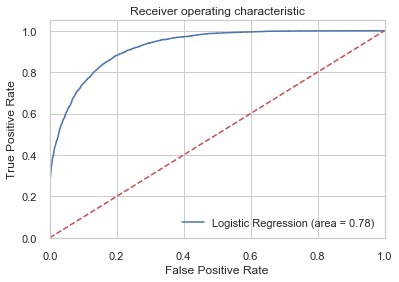

In [77]:
xgb = XGBClassifier()
model_fit(xgb,x_train,x_test,y_train,y_test,'XGBClassifier')

In [78]:
scv=SVC()
model_fit(scv,x_train,x_test,y_train,y_test,'SVC')

 Train Accuracy-Score : 0.8563711156267036
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     15124
           1       0.77      0.61      0.68      5053

    accuracy                           0.86     20177
   macro avg       0.82      0.77      0.79     20177
weighted avg       0.85      0.86      0.85     20177

 Test Accuracy-Score : 0.8401942645698427
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6479
           1       0.74      0.57      0.64      2169

    accuracy                           0.84      8648
   macro avg       0.80      0.75      0.77      8648
weighted avg       0.83      0.84      0.83      8648



## HyperTunning

In [79]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [80]:
classifier=XGBClassifier()

In [81]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=100,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [82]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 32.9min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='warn', n_iter=100, n_jobs=-1,
                   param_distri

In [83]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1,
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [84]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 6,
 'learning_rate': 0.3,
 'gamma': 0.1,
 'colsample_bytree': 0.3}

In [85]:
xgb=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1,
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

 Train Accuracy-Score : 0.8893789958864053
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     15124
           1       0.82      0.71      0.76      5053

    accuracy                           0.89     20177
   macro avg       0.87      0.83      0.85     20177
weighted avg       0.89      0.89      0.89     20177

 Test Accuracy-Score : 0.865286771507863
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6479
           1       0.78      0.65      0.71      2169

    accuracy                           0.87      8648
   macro avg       0.83      0.79      0.81      8648
weighted avg       0.86      0.87      0.86      8648



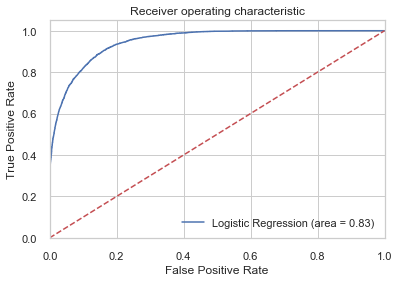

In [86]:
model_fit(xgb,x_train,x_test,y_train,y_test,'XGBClassifier_Tunning')

## Final Result

In [89]:
def finalResult():
    result = pd.DataFrame([model_name,accuracy_train,accuracy_test]).T
    result.columns = ["Model_Name", "Train", "Test"]
    result.to_excel('Model.xlsx',index=False)
    return result;

In [90]:
result = finalResult()

In [94]:
result.sort_values(by='Train', ascending=False, na_position='first')

,Model_Name,Train,Test
8,RandomForestClassifier,0.969074,0.834181
12,XGBClassifier_Tunning,0.889379,0.865287
1,KNeighborsClassifier,0.874164,0.821577
9,GradientBoostingClassifier,0.866234,0.859274
10,XGBClassifier,0.864004,0.858117
7,AdaBoostClassifier,0.86326,0.858117
11,SVC,0.856371,0.840194
2,lasso,0.850275,0.842738
0,LogisticRegression,0.850126,0.842507
3,ridge,0.850126,0.842507
